In [1]:
import numpy as np 
import pandas as pd 
import nltk

In [2]:
import pandas
df_sms = pd.read_csv('spam.csv',encoding='latin-1')
df_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df_sms = df_sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df_sms = df_sms.rename(columns={"v1":"label", "v2":"sms"})
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
print(len(df_sms))

5572


In [5]:
df_sms.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df_sms['length'] = df_sms['sms'].apply(len)
df_sms.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

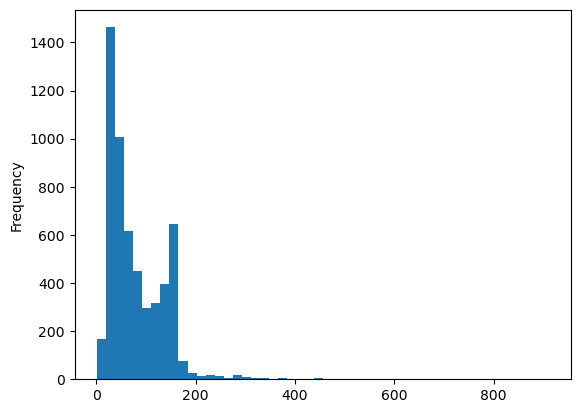

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_sms['length'].plot(bins=50, kind='hist')

In [8]:
df_sms.loc[:,'label'] = df_sms.label.map({'ham':0, 'spam':1})
print(df_sms.shape)
df_sms.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [9]:
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)

['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


In [10]:
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))
    
sans_punctuation_documents

['hello how are you',
 'win money win from home',
 'call me now',
 'hello call hello you tomorrow']

In [11]:
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['hello', 'how', 'are', 'you'],
 ['win', 'money', 'win', 'from', 'home'],
 ['call', 'me', 'now'],
 ['hello', 'call', 'hello', 'you', 'tomorrow']]

In [12]:
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [14]:
count_vector.fit(documents)
count_vector.get_feature_names_out()


array(['are', 'call', 'from', 'hello', 'home', 'how', 'me', 'money',
       'now', 'tomorrow', 'win', 'you'], dtype=object)

In [15]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]])

In [16]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names_out())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], 
                                                    df_sms['label'],test_size=0.20, 
                                                    random_state=1)

In [18]:
count_vector = CountVectorizer()


training_data = count_vector.fit_transform(X_train)

 
testing_data = count_vector.transform(X_test)

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)


In [20]:
training_data = count_vector.transform(X_train)

In [21]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [22]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [23]:
predictions = naive_bayes.predict(testing_data)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9847533632286996
Precision score: 0.9420289855072463
Recall score: 0.935251798561151
F1 score: 0.9386281588447654


In [25]:
import pickle


with open("spam_model.pkl", "wb") as f:
    pickle.dump(naive_bayes, f)


with open("vectorizer.pkl", "wb") as f:
    pickle.dump(count_vector, f)

print("Model and vectorizer saved successfully")



Model and vectorizer saved successfully


In [26]:
import os
os.listdir()



['.anaconda',
 '.cache',
 '.claude',
 '.conda',
 '.condarc',
 '.continuum',
 '.gitconfig',
 '.hf-cli',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.lesshst',
 '.local',
 '.matplotlib',
 '.ollama',
 '.pyforest',
 '.streamlit',
 '.vscode',
 'advertising.csv',
 'AIML.ipynb',
 'anaconda3',
 'app.py',
 'AppData',
 'Application Data',
 'blobs',
 'Contacts',
 'Cookies',
 'Desktop',
 'Documents',
 'Downloads',
 'example.bin',
 'example.csv',
 'example.txt',
 'Favorites',
 'flank.py',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'manifests',
 'miniconda3',
 'Music',
 'My Documents',
 'NetHood',
 'New folder',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{21147993-4dd4-11ef-b7fc-381428507abc}.TM.blf',
 'NTUSER.DAT{21147993-4dd4-11ef-b7fc-381428507abc}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{21147993-4dd4-11ef-b7fc-381428507abc}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'Ollama_chatbot',
 'OneDrive',
 'Pict

In [27]:
import os
print(os.getcwd())


C:\Users\USER


In [28]:
os.listdir()


['.anaconda',
 '.cache',
 '.claude',
 '.conda',
 '.condarc',
 '.continuum',
 '.gitconfig',
 '.hf-cli',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.lesshst',
 '.local',
 '.matplotlib',
 '.ollama',
 '.pyforest',
 '.streamlit',
 '.vscode',
 'advertising.csv',
 'AIML.ipynb',
 'anaconda3',
 'app.py',
 'AppData',
 'Application Data',
 'blobs',
 'Contacts',
 'Cookies',
 'Desktop',
 'Documents',
 'Downloads',
 'example.bin',
 'example.csv',
 'example.txt',
 'Favorites',
 'flank.py',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'manifests',
 'miniconda3',
 'Music',
 'My Documents',
 'NetHood',
 'New folder',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{21147993-4dd4-11ef-b7fc-381428507abc}.TM.blf',
 'NTUSER.DAT{21147993-4dd4-11ef-b7fc-381428507abc}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{21147993-4dd4-11ef-b7fc-381428507abc}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'Ollama_chatbot',
 'OneDrive',
 'Pict

In [ ]:
!python app.py
